### 2nd order Runge Kutta method


In [1]:
function approx = midpointMethod(h, t, y, f, n)
    approx = zeros(n+1,2);
    approx(1,:) = [t,y];
    for i=2:n+1
        k_1 = h*f(t, y);
        k_2 = h*f(t + 1/2*h, y + 1/2*k_1);
        y = y + k_2;
        t = t+h;
        approx(i,:) = [t,y];
    end
end

function ans = solution(t)
    C = -0.5; #solve for C where y(0)=0.5;
    ans = t.^2 + 2.*t + 1 + C*e.^t;
end

function ans = yPrime(t, y) #first derivative of the solution
    ans = y - t^2 + 1;
end

h = 0.2; # change in t each iteration
t_0 = 0; # initial condition for t
y_0 = 0.5; # initial condition for y
n = 30; # count of steps to take in making the approximation

approx = midpointMethod(h, t_0, y_0, @yPrime, n);

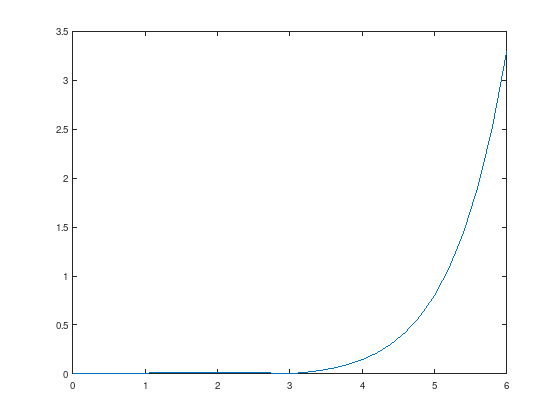

In [7]:
t = 0:0.2:h*n;
y = solution(t);

residualsOrder2 = abs(y - transpose(approx(:,2)));
plot(t, residualsOrder2);
#plot(transpose(approx(:,1)), transpose(approx(:,2)));


### 4th order Runge-Kutta method

Use the same method as before, but with a 4th order RK method.

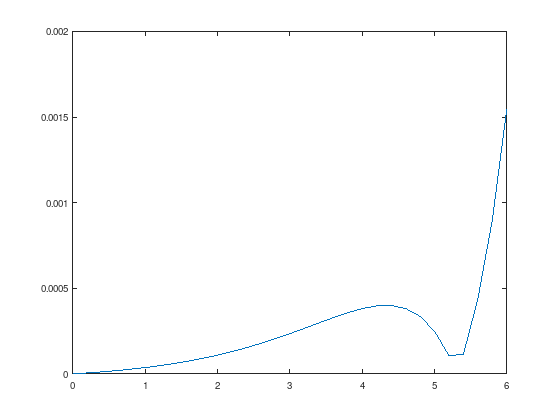

In [9]:
[xRK, yRK] = RungeKuttaOrder4(@yPrime, t_0, y_0, h, h*n);

residualsOrder4 = abs(y - yRK);

plot(t, residualsOrder4);